# <center>《机器学习特征工程实用方法精讲》        

# <font face="仿宋">课程说明：

&emsp;&emsp;<font face="仿宋">小伙伴好呀\~欢迎来到《2022机器学习实战训练营》试学体验课！我是课程主讲老师，九天。       
&emsp;&emsp;本次体验课为期三天（1月12-14号），期间每晚8点在我的B站直播间公开直播，直播间地址:https://live.bilibili.com/22678166      
&emsp;&emsp;本期公开课我们将聚焦于特征工程中的常用方法，三天直播每天一个热门主题，带大家快速掌握特征工程实用方法、算法竞赛常用思路。公开课内容节选自《2022机器学习实战训练营》付费正课，2022新版机器学习课程全新升级、重磅上线，正课信息详见https://appZe9inzwc2314.h5.xiaoeknow.com        
&emsp;&emsp;课程资料/数据/代码/付费课程信息，扫码添加客服“小可爱”回复【ML】即可领取哦~

<center><img src="https://i.loli.net/2021/10/20/ZWTgxSiNY1db9eL.png" alt="二维码" style="zoom:33%;" />

&emsp;&emsp;<font face="仿宋">另外，2022新版课程上新特惠持续进行中，十周90+课时体系大课限时七折，扫码咨询小可爱回复“优惠”，还可领取额外折上折优惠，课程主页：https://appze9inzwc2314.pc.xiaoe-tech.com

---

# <center> 机器学习特征工程实用方法精讲

# <center>Day 1.缺失值处理

首先，先来看这三天的整体安排。

<center><img src="https://s2.loli.net/2022/01/12/xUlyDGP91jw83bg.png" alt="image-20220112124405414" style="zoom:50%;" />

## <center>Part 1.基本概念回顾

### 1.缺失值基本定义

&emsp;&emsp;首先，我们先来看缺失值的定义与表现。

缺失值定义：

### <center><font face="仿宋"> 在生成、采集、计算过程中被遗漏的数据信息，被称为缺失值

也就是说，所谓缺失值，其根本含义是指数据代表真实状态下的信息的缺失。尝试观察如下表格，判断哪个未被记录的值是缺失的：

<center><img src="https://s2.loli.net/2022/01/12/lRpWgy8YwGTJNzr.png" alt="image-20220112131505681" style="zoom:50%;" />

此处张三的学号和李四的学科B在进行数据记录时都显示的是缺失，但根据简单业务逻辑推断，缺考时成绩应被记为0，因此李四的学科B一项并不能看成是缺失值，而应该被看成是0值。

&emsp;&emsp;所以，并不是表现为缺失状态的值就一定是缺失值。

> 当然，通过业务推断来对部分值进行填补，也是数据预处理环节至关重要的一环。

### 2.缺失值的具体表现形式及检验方法

&emsp;&emsp;对于真实信息缺失的值，在Python中有很多种记录形式，我们可以用Python原生对象的None来进行表示，也可以采用NumPy中的np.nan来进行表示。当然，在大多数时候，我们都会更希望借助NumPy中的科学计算过程，因此更推荐将缺失值表示为np.nan

In [1]:
import numpy as np
import pandas as pd

In [2]:
None

In [3]:
np.nan

nan

- 以np.nan形式表示的缺失值

In [27]:
df1 = pd.DataFrame({'A':[1, 2, 3], 'B':[2, 3, np.nan]})

In [28]:
df1

,A,B
0,1,2.0
1,2,3.0
2,3,NaN


- 通过info查看缺失值情况

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      int64  
 1   B       2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


- 用isnull/isna检验缺失值

In [29]:
df1.isnull()

,A,B
0,False,False
1,False,False
2,False,True


In [30]:
df1.isna()

,A,B
0,False,False
1,False,False
2,False,True


- 按列检验缺失值

In [31]:
df1.isnull().sum()

A    0
B    1
dtype: int64

- 计算每一列缺失值占比

In [33]:
def missing (df):
    """
    计算每一列的缺失值及占比
    """
    missing_number = df.isnull().sum().sort_values(ascending=False)              # 每一列的缺失值求和后降序排序                  
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)          # 每一列缺失值占比
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])      # 合并为一个DataFrame
    return missing_values

In [34]:
missing (df1)

,Missing_Number,Missing_Percent
B,1,0.333333
A,0,0.000000


- 隐藏缺失值

&emsp;&emsp;此外，在实际处理数据时，我们还会遇到一些隐藏的缺失数据，即虽然没有形式上的缺失，但实际上却代表的信息缺失的含义。我们拿到了⼀个糖尿病的数据集，数据集共有9列，768个数据点（⾏）。这个数据集希望通过体检结果细节，
预测21岁以上的⽪⻢印第安⼥性5年内是否会患糖尿病。也就是⼀个⼆分类的问题。

<center><img src="https://s2.loli.net/2022/01/12/CuTXlA1LRBhfKHk.png" alt="image-20220112135002023" style="zoom:50%;" />

In [35]:
pima = pd.read_csv('pima.csv')

In [37]:
pima.head(5)

,怀孕次数,2小时耐量试验值,舒张压,三头肌皮褶厚度,2小时血清胰岛素浓度,BMI,遗传函数,age,是否患病
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   怀孕次数        768 non-null    int64  
 1   2小时耐量试验值    768 non-null    int64  
 2   舒张压         768 non-null    int64  
 3   三头肌皮褶厚度     768 non-null    int64  
 4   2小时血清胰岛素浓度  768 non-null    int64  
 5   BMI         768 non-null    float64
 6   遗传函数        768 non-null    float64
 7   age         768 non-null    int64  
 8   是否患病        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
missing(pima)

,Missing_Number,Missing_Percent
怀孕次数,0,0.0
2小时耐量试验值,0,0.0
舒张压,0,0.0
三头肌皮褶厚度,0,0.0
2小时血清胰岛素浓度,0,0.0
BMI,0,0.0
遗传函数,0,0.0
age,0,0.0
是否患病,0,0.0


In [40]:
pima.describe()

,怀孕次数,2小时耐量试验值,舒张压,三头肌皮褶厚度,2小时血清胰岛素浓度,BMI,遗传函数,age,是否患病
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


该记录中的0值，实际上都是缺失值。

- 缺失值情况分类

### 3.缺失值处理

目前常见的缺失值处理方法一览：

<center><img src="https://s2.loli.net/2022/01/12/26H9cbdigPpnav5.png" alt="image-20220112170410691" style="zoom:33%;" />

使用时注意事项：

- 非特殊情况不建议采用模型自带的填补方法。CART树的填补仅会导向训练集模型结果最优，但不一定能真实的反应数据真实规律，模型容易过拟合；LGB则是简单的把缺失值看成一类，实际上也就是在执行真值转化；      
- 无论何时，如果能够从业务上推断出缺失值的真是取值，都应该首先采用该值进行填补，这是最高优先级的填补策略没有之一；      
- 缺失值的占比也会很大程度上影响缺失值填补策略的选择。缺失值占比过大或过小，都没有太大的填补意义。例如，当缺失值比例超过80%时，我们几乎不可能从剩余的20%的数据中还原这一列应有的原始信息，无论用哪种方法填补，“瞎猜”的成分都比较大，最后的建模风险会非常高，因此建议删除；而如果缺失值占比过小，例如仅有0.5%缺失值，则无论用哪种方法填补，实际上数据的变动都不会对该特征的分布造成太大的影响，因此填补的效果也非常有限，此时应优先考虑高效快速完成填补事宜；当然，如果缺失值的比例为50%左右时，此时“猜测”缺失值的取值也变的意义不大，而是否缺失这件事情本身可能会更有价值；      
- 很多时候，缺失值填补也不一定仅仅停留在对当前列的缺失数据进行修改，很多时候我们可以采用不同填补方案、生成多个列，然后在实际进行特征筛选时再进行挑选，甚至可以借助一些优化器帮我们筛选出最佳填补列。

---

## <center>Part 2.简单插补法

#### 1.零值/均值/特殊值填补

在Pandas中实现过程：

In [48]:
data = pd.read_csv('pima2.csv')
data
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   怀孕次数        494 non-null    int64  
 1   2小时耐量试验值    494 non-null    float64
 2   舒张压         494 non-null    float64
 3   三头肌皮褶厚度     494 non-null    float64
 4   2小时血清胰岛素浓度  494 non-null    float64
 5   BMI         494 non-null    float64
 6   遗传函数        494 non-null    float64
 7   age         494 non-null    int64  
 8   是否患病        494 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 34.9 KB


(494, 9)

In [49]:
# 1、确定插⼊缺失值的⽐例
missing_rate = 0.3

# 2、计算插⼊缺失值的点数
X_full, y_full = data.iloc[:,:-1], data.iloc[:,-1]
n_samples = X_full.shape[0]
n_features= X_full.shape[1]
n_missing_samples =int(np.round(n_samples * n_features * missing_rate))
#n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#np.floor向下取整，返回.0格式的浮点数
#np.round向上取整，返回.0格式的浮点数
#我们希望放⼊的缺失数据的⽐例假设是30%，那总共就要有1185-1186个数据缺失
n_missing_samples

# 3、获得插⼊缺失值的位置的索引
rng = np.random.RandomState(0)
# 缺失值插⼊位置的列索引 (0,8,1186)
missing_col_index = rng.randint(0,n_features,n_missing_samples)
# 缺失值插⼊位置的⾏索引(0,494,1186)
missing_row_index = rng.randint(0,n_samples,n_missing_samples)

# 4、按照对应的⾏索引和列索隐插⼊缺失值到指定位置：
X_missing = X_full.copy()
y_missing = y_full.copy()
# 按照索引数据（DataFrame）插⼊缺失值
for i in range(n_missing_samples):
    X_missing.iloc[missing_row_index[i],missing_col_index[i]] = np.nan
# 把标签列拼接回来，使数据集和原始数据集维度⼀致
data_missing = X_missing
data_missing["是否患病"] = y_missing

In [50]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [51]:
plt.style.use('fivethirtyeight') # ⼀种⽐较流⾏的绘图⻛格
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #显示中⽂标签
plt.rcParams['axes.unicode_minus']=False #⽤来正常显示负号
sns.set(font='Arial Unicode MS',font_scale=1.2) # mac⽤户解决Seaborn中⽂
%matplotlib inline

findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


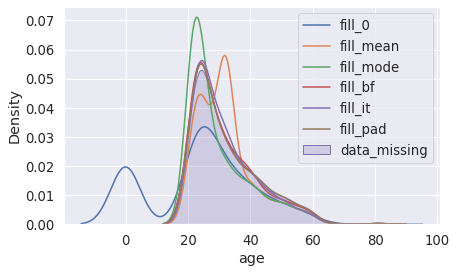

In [53]:
# ⽤0填补缺失值
data_fill_0 = data_missing.copy()
data_fill_0 = data_fill_0.fillna(value = 0)

# ⽤均值填补缺失值
data_fill_mean = data_missing.copy()
data_fill_mean["age"] = data_fill_mean["age"].fillna(data_fill_mean["age"].mean())
data_fill_mean.isnull().sum()

# ⽤众数填补缺失值
data_fill_mode = data_missing.copy()
data_fill_mode["age"] = data_fill_mode["age"].fillna(data_fill_mode["age"].mode()[0])
data_fill_mode.isnull().sum()

# 使⽤下⼀个值填补缺失值
"""
method =
    ffill/pad:从缺失值前⾯的有效值来从前往后填充
    bfill/backfill:从缺失值后⾯的有效值来从后往前填补
"""
data_fill_bf = data_missing.copy()
data_fill_bf["age"]= data_fill_bf["age"].fillna(method='bfill')

# 使⽤前⼀个值填补缺失值
data_fill_pad = data.copy()
data_fill_pad["age"]= data_fill_pad["age"].fillna(method='pad')

# 使⽤插值函数插补缺失值
"""
method =
    nearest：最邻近插值法
    zero：阶梯插值
    slinear、linear：线性插值
    quadratic、cubic：2、3阶B样条曲线插值
"""
data_fill_it = data_missing.copy()
data_fill_it["age"]= data_fill_it["age"].interpolate(method = "linear")

# 可视化数据拟合情况
datas = [data_fill_0,data_fill_mean,data_fill_mode,data_fill_bf,data_fill_it,data_fill_pad]
mths = ["fill_0","fill_mean","fill_mode","fill_bf","fill_it","fill_pad","data_missing"]
plt.figure()
ax = sns.kdeplot(data_missing["age"],color = "m",shade = True)
for dat in datas:
    ax = sns.kdeplot(dat["age"])
ax = ax.legend(mths)
plt.show()

在sklearn中实现过程：

In [70]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import lagrange #scipy⾃带的拉格朗⽇插值函数
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
plt.style.use('fivethirtyeight') # ⼀种⽐较流⾏的绘图⻛格
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #显示中⽂标签
plt.rcParams['axes.unicode_minus']=False #⽤来正常显示负号
sns.set(font='Arial Unicode MS',font_scale=1.2) # mac⽤户解决Seaborn中⽂
import warnings
warnings.filterwarnings("ignore")

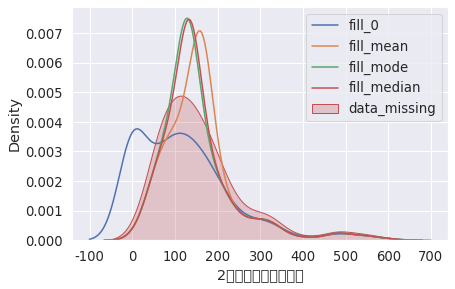

In [71]:
mm = np.array(data_missing['2小时血清胰岛素浓度']).reshape(-1,1) #sklearn当中特征矩阵必须是⼆维

# ⽤0填充
data_imp_0 = data_missing.copy()
imp_0 = SimpleImputer(strategy="constant",fill_value=0) # 实例化，⽤0填充
imp_0 = imp_0.fit_transform(mm)                         # fit_transform⼀步调取填补结果
data_imp_0.loc[:,'2小时血清胰岛素浓度'] = imp_0
data_imp_0.isnull().sum()

# ⽤均值填充
data_imp_mean = data_missing.copy()
imp_mean = SimpleImputer()                               #实例化，默认均值填补
imp_mean = imp_mean.fit_transform(mm)                    # fit_transform⼀步调取填补结果
data_imp_mean.loc[:,'2小时血清胰岛素浓度'] = imp_mean
data_imp_mean.isnull().sum()

# ⽤众数填充
data_imp_mode = data_missing.copy()
imp_mode = SimpleImputer(strategy="most_frequent") #⽤众数填补缺失值
imp_mode = imp_mode.fit_transform(mm) # fit_transform⼀步调取填补结果
data_imp_mode.loc[:,'2小时血清胰岛素浓度'] = imp_mode
data_imp_mode.isnull().sum()

# ⽤中位数填充
data_imp_median = data_missing.copy()
imp_median = SimpleImputer(strategy="median") #⽤中位数填补
imp_median = imp_median.fit_transform(mm) # fit_transform⼀步调取填补结果
data_imp_median.loc[:,'2小时血清胰岛素浓度'] = imp_median
data_imp_median.isnull().sum()

# 画图看拟合情况
datas = [data_imp_0,data_imp_mean,data_imp_mode,data_imp_median] # 基于不同填补⽅法的数据集列表
mths = ["fill_0","fill_mean","fill_mode","fill_median","data_missing"] # 图例名称列表
plt.figure() # 初始化⼀个画布
ax = sns.kdeplot(data_missing['2小时血清胰岛素浓度'],color = "r",shade = True) # 绘制原始数据分布
for dat in datas:
    ax = sns.kdeplot(dat['2小时血清胰岛素浓度'])                            # 逐个填补后的数据分布
ax = ax.legend(mths)                                                   # 图例名称
plt.show()

- 分层均值

&emsp;&emsp;所谓分层均值，指的是先找出缺失值列（A）和与之相关性最强的一个属性（B），然后对B列进行聚类分层，并按照相同划分方式对A进行划分，然后查询每个缺失值对应的B列中的值所属簇，然后取该簇的均值作为缺失值的填补值，相关过程如下：

(均值填补)

<center><img src="https://s2.loli.net/2022/01/12/4f8Ho96AZ7InkKg.png" alt="image-20220112173844538" style="zoom:50%;" />

(分层均值填补)

<center><img src="https://s2.loli.net/2022/01/12/RcNQKTLqxM6oh9D.png" alt="image-20220112173904473" style="zoom:50%;" />

In [72]:
# 选择age列进⾏数据分层，⾸先⽤均值填补age列缺失值
data_fill_mean = data_missing.copy()
data_fill_mean["age"] = data_fill_mean["age"].fillna(data_fill_mean["age"].mean())
data_fill_mean.isnull().sum()


# 以age列的规律进⾏数据分层，并使⽤分层均值填补"2⼩时⾎清胰岛素浓度"列的缺失值
# 1、对数据分组保留记录，⽤于后续分层均值填补验证
data_range = data_fill_mean["age"].max() - data_fill_mean["age"].min()
data_group = data_range / 12
bins = [int(data_fill_mean["age"].min() -1) +12*i for i in range(6)]
bins[-1] = int(data_fill_mean["age"].max())+1
labels = []
for i in range(len(bins)-1):
    labels.append(str([bins[i],bins[i+1]]))
    i += 1
# 将sale对应到指定的分组区间
df = data_fill_mean.copy()
df['age_catg'] =pd.cut(data_fill_mean.age,bins)
# 统计每组频数
aggResult = df.groupby(by = ['age_catg']).agg({'age':'count'})
aggResult

# 2、以age分层结果将“2⼩时⾎清胰岛素浓度”按照分层均值填补
data_fill_avmean = data_fill_mean.copy() # 使⽤填补过"age"列缺失值的数据为原始数据进⾏后续操作
for i in range(len(bins)-1):
    ser = (data_fill_avmean["age"] > bins[i] ) & (data_fill_avmean["age"] <= bins[i+1])
    df = data_fill_avmean['2小时血清胰岛素浓度'][ser]
    avmean = df.mean()
    bool_index = df.index[np.where(np.isnan(df))]
    for k in range(len(bool_index)):
        data_fill_avmean.loc[bool_index[k],'2小时血清胰岛素浓度'] = avmean
data_fill_avmean.isnull().sum()

# 3、使⽤sklearn.impute.SimpleImputer进⾏均值填补
mm = np.array(data_missing.loc[:,'2小时血清胰岛素浓度']).reshape(-1,1) #sklearn当中特征矩阵必须是⼆维
data_imp_mean = data_fill_mean.copy() #为便于对⽐，这⾥与data_fill_avmean的原始数据保持⼀致
imp_mean = SimpleImputer() #实例化，默认均值填补
imp_mean = imp_mean.fit_transform(mm)
data_imp_mean.loc[:,'2小时血清胰岛素浓度'] = imp_mean
data_imp_mean.isnull().sum()

怀孕次数          126
2小时耐量试验值      122
舒张压           130
三头肌皮褶厚度       140
2小时血清胰岛素浓度      0
BMI           121
遗传函数          133
age             0
是否患病            0
dtype: int64

In [73]:
aggResult

,age
age_catg,
"(20, 32]",234
"(32, 44]",205
"(44, 56]",41
"(56, 68]",13
"(68, 82]",1


In [75]:
len(data_fill_avmean['2小时血清胰岛素浓度'][(data_fill_avmean["age"]> bins[0])&
(data_fill_avmean["age"]<= bins[1])])

234

对比分层均值和普通均值结果

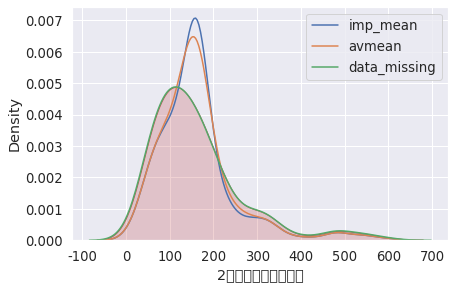

In [76]:
# 分层均值填补⽅法和均值填补⽅法与原数据拟合对⽐
datas = [data_imp_mean,data_fill_avmean,data_missing]
mths = ["imp_mean","avmean","data_missing"]
plt.figure()
ax = sns.kdeplot(data_missing['2小时血清胰岛素浓度'],color = "r",shade = True)
for dat in datas:
    ax = sns.kdeplot(dat['2小时血清胰岛素浓度'])
ax = ax.legend(mths)
plt.show()

- 若采用K-Means聚类算法，则能够更显著提升分层均值效果；      
- 在大多数情况下，分层均值效果都要好于普通均值效果；

#### 2.热平台插补法

&emsp;&emsp;热平台插补法是指在⼀组完整样本中寻找与不完整样本相似的样本，并利⽤该样本的属性值填补缺失值。平台插补⽅法不以统计量或推测值为填补结果，⽽是直接以数据集中样本⾃身的数值为填补值。通常我们会到超出⼀个的相似对象，在所有匹配对象中没有最好的，⽽是从中随机的挑选⼀个作为填充值。在此类⽅法设计过程中，需要解决的主要问题是：如何选择相似样本。处理该问题⾸先要确定相似样本的来源。传统的平台插补法从整个数据集完整样本中寻找与不完整样本相似的样本，不仅会增加算法的时间复杂度和空间复杂度，还往往使得所选样本与不完整样本的相似度不⾼，影响填补精度。

- 随机热平台插补

&emsp;&emsp;随机热平台插补法从不完整样本所在⼦集中随机抽取完整样本作为其相似样本，并将相似本的现有值作为填补结果。该⽅法的主要优势在于当不完整样本数量较多时，其选择相似样本的⽅式可视为种有放回的随机抽样，所得填补结果不会影响样本总体分布情况。

- 最近邻热平台插补

&emsp;&emsp;最近邻热平台插补法根据不完整样本中的现有值计算其与完整样本的距离，从⽽选择相似样本。为了获得更加精确的
近邻样本，该⽅法通常根据与不完整属性相关联的属性计算样本距离。

- 序贯热平台插补

&emsp;&emsp;序贯热平台插补法通过计算属性间的相关性找出与不完整属性相关性最⾼的完整属性，随后对⼦集内的样本基于该完
整属性按照⼀定的顺序排列。对于不完整属性中的缺失值，将其上⽅相邻样本的现有值作为填补结果。

三种热平台插补法对比：

In [83]:
# ⼀、查看数据基本情况
import numpy as np
import pandas as pd
#import miceforest as mf
data = pd.read_csv("pima2.csv")
data
data.info()
data.shape

# ⼆、插⼊缺失值
# 1、确定插⼊缺失值的⽐例
missing_rate = 0.1
# 2、计算插⼊缺失值的点数
X_full, y_full = data.iloc[:,:3], data.iloc[:,3:]
n_samples = X_full.shape[0]
n_features= X_full.shape[1]
n_missing_samples =int(np.round(n_samples * n_features * missing_rate))
#n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#np.floor向下取整，返回.0格式的浮点数
#np.round向上取整，返回.0格式的浮点数
#我们希望放⼊的缺失数据的⽐例假设是30%，那总共就要有1185-1186个数据缺失
n_missing_samples

# 3、获得插⼊缺失值的位置的索引
rng = np.random.RandomState(0)
# 缺失值插⼊位置的列索引 (0,8,1186)
missing_col_index = rng.randint(0,n_features,n_missing_samples)
# 缺失值插⼊位置的⾏索引(0,494,1186)
missing_row_index = rng.randint(0,n_samples,n_missing_samples)

# 4、按照对应的⾏索引和列索隐插⼊缺失值到指定位置：
X_missing = X_full.copy()
y_missing = y_full.copy()
# 按照索引数据（DataFrame）插⼊缺失值
for i in range(n_missing_samples):
    X_missing.iloc[missing_row_index[i],missing_col_index[i]] = np.nan
# 把标签列拼接回来，使数据集和原始数据集维度⼀致
data_missing = X_missing
data_missing[y_full.columns] = y_missing
data_missing = data_missing.iloc[:,:-1]
data_missing.info()

# 三、序贯热平台填补缺失值
# 对数据分组
data2 = data_missing.copy()
data_range = data2["age"].max() - data2["age"].min()
data_group = data_range / 12
bins = [20,28,35,45,82]
labels = []
for i in range(len(bins)-1):
    labels.append(str([bins[i],bins[i+1]]))
    i += 1
# 将age对应到指定的分组区间
data2['age_catg'] =pd.cut(data2.age,bins)
# 统计每组频数
aggResult = data2.groupby(by = ['age_catg']).agg({'age':'count'})
aggResult

# 分组并保存⼦集
tp = []
LF = []
for i in range(aggResult.shape[0]):
    tpl= data2[data2["age_catg"] == aggResult.index[i]]
    tp.append(tpl)
    df = pd.DataFrame(tp[i].isnull().sum())
    df_not_null_index = df[df[0]== 0].index
    df_null_index = df[df[0]!= 0].index
    full_feature = tp[i][df_not_null_index]
    for j in range(len(df_null_index)):
        L_full_feature = full_feature.copy()
        L_full_feature[df_null_index[j]] = tp[i][df_null_index[j]]
        LF.append(L_full_feature)
len(LF)

df_LF = np.array(LF,dtype = object)
df_LF = df_LF.reshape(len(tp),-1)
df_LF.shape


# 计算相关系数，选择与缺失属性相关性最⾼的属性进⾏数据重新排序，并使⽤缺失值的下⼀个有效值进⾏缺失值填补
# 填补完毕后⽤填补过的属性替换分组数据集中的相应字段
for i in range(df_LF.shape[0]):
    for j in range(df_LF.shape[1]):
        corrs = df_LF[i][j].corr()
        best_feat = df_LF[i][j].corr().abs().round(2).sort_values(by = df_null_index[j],ascending = False).index[1]
        df_LF[i][j] = df_LF[i][j].sort_values(by = best_feat,ascending = False)
        df_LF[i][j][df_null_index[j]] = df_LF[i][j][df_null_index[j]].fillna(method = "bfill").fillna(df_LF[i][j][df_null_index[j]].mean())
        df_LF[i][j] = df_LF[i][j].sort_index()

        s = tp[i].copy()
        s.loc[:,df_null_index[j]] = df_LF[i][j][df_null_index[j]]
        tp[i] = s.copy()
        
# 最后拼接每组填补好的数据，并重新按照索引排序，恢复数据原本排列
data_fill = pd.concat([i for i in tp])
data_fill = data_fill.sort_index()

# 查看最终填补完毕后数据的缺失值情况
data_fill.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   怀孕次数        494 non-null    int64  
 1   2小时耐量试验值    494 non-null    float64
 2   舒张压         494 non-null    float64
 3   三头肌皮褶厚度     494 non-null    float64
 4   2小时血清胰岛素浓度  494 non-null    float64
 5   BMI         494 non-null    float64
 6   遗传函数        494 non-null    float64
 7   age         494 non-null    int64  
 8   是否患病        494 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 34.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   怀孕次数        442 non-null    float64
 1   2小时耐量试验值    452 non-null    float64
 2   舒张压         443 non-null    float64
 3   三头肌皮褶厚度     494 non-null    float64
 4   2小时血清胰岛素浓度  494 non-null    float64
 5 

怀孕次数          0
2小时耐量试验值      0
舒张压           0
三头肌皮褶厚度       0
2小时血清胰岛素浓度    0
BMI           0
遗传函数          0
age           0
age_catg      0
dtype: int64

---

## <center>Part 3.进阶插补法

#### 1.插值法

&emsp;&emsp;在离散数据的基础上补插连续的函数，使得这条连续函数经过所有离散数据点，通过这个连续函数我可以计算出任意⼀个点的近似函数值，将这个近似函数值作为插补值，从⽽实现插值。其实在线性插补⽅法中，我们已经看到了插值的思想：我们只需要知道前后两个点的数据就可以进⾏插补，这个待插补值就是前后两点连成的直线所确定的函数在当前待插补位置的函数值，它的实现⽅法之⼀如下图：

<center><img src="https://s2.loli.net/2022/01/12/3HKbAoJgpztxLTu.png" alt="image-20220112174701097" style="zoom:50%;" />

&emsp;&emsp;但是，这种近似插补的⽅法太粗糙，在实际情况下，我们有时候需要更为精准的插补⽅法来⽀持我们的后续⼯作。这⾥我们引⼊插值法，其意义在于：插值是离散函数逼近的重要⽅法，利⽤它可通过函数在有限个点处的取值状况，估算出函数在其他点处的近似值，即利⽤已知点建⽴合适的插值函数$f(x)$，未知点由对应的点$x_i$求出的函数$f(x_i)$值近似代替。

&emsp;&emsp;这⾥呢，我们将⼀个函数类作为未知函数$f(x)$的近似函数，这个函数类可以是多项式，可以是三⻆函数，也可以是任何可以表示复杂现象的函数类。不论是哪⼀类函数，我们的这个函都是由若⼲个插值条件来确定的：$f(x_i)=y_i(i=1,2,...,n)$，即这个函数可以通过所有样本点。        
&emsp;&emsp;基于这个逻辑，由插值节点确定的插值函数的函数值就可以作为缺失值的近似插补值。      
&emsp;&emsp;那这⾥我们就需要知道，这个近似函数和近似函数值如何定。⾸先，近似函数值是基于近似插值函数计算得到的。因此我们只需要找到这个近似插值函数！那么问题来这，这个近似函数如何确定呢？⽐如我们这⾥我们假定存在⼀个未知函数$y=f(x)$，已知若⼲个点处的函数值：

<center><img src="https://s2.loli.net/2022/01/12/SuVDs4iMtvymIgF.png" alt="image-20220112175330602" style="zoom:50%;" />

那我们都知道，任意的的⼀组有限个数的数，我们都可以寻找到他们的通项，就是找到⼀个函数 可以通过述的所有点。那这个函数所确定的曲线其实可以是多种情况的：

<center><img src="https://s2.loli.net/2022/01/12/5PXbR86IUuLtdcQ.png" alt="image-20220112175353007" style="zoom:50%;" />

因此，满⾜上述数据的函数有⽆数个，我们究竟使⽤哪⼀个近似函数作为我们最终的插值函数来求解这个似替代值呢？这⾥就需要⼀个简单的规则了：众多有限个数据的通项，他们可以是三⻆函数、也可以是多项函数等。⽽我们在插值的时候，是尽量找到⼀个满⾜上述数据的⾜够好的函数，来代表或者近似$f(x)$，那这⾥我们就要对⾜够好设定⼀个统⼀的标准：        
- 形式简单        
- 容易计算        
- ⾜够好的形态，即具有⾜够⾼阶的导数（可导优于连续，连续优于离散）。        

具有这样的特点的函数，通常是⼀类函数：多项式函数！       
那这⾥我们既然已经确定了多项式函数这⼀类函作为插值函数的近似函数，那我们就知道了插值函数的具体形式了。⽐如，该组数据⼀共有 个插值节点，也是说具有 个插值条件，要使这些插值条件同时得到满⾜，只能使⽤n-1次多项式作为插值函数，显然这样的插值函数具有以下形式：

$$y=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}$$

根据插值条件的不同，我们得到的插值函数也不同。⽽插值节点互不相同，上述的⽅程必然有唯⼀的解。就是多项式函数可以作为插值函数的近似函数的原因了。我们通过求解近似函数的解，就可以得到缺失值的似带插补值。那多项式插值中具有代表的函数包括：拉格朗⽇插值法，⽜顿插值法......

【更多数学理论细节讨论，详见正课】

<center><img src="https://s2.loli.net/2022/01/12/8n4uvaZpMFdbwSs.png" alt="image-20220112175854840" style="zoom:33%;" />

<center><img src="https://s2.loli.net/2022/01/12/R2Ep15X7ndbkrju.png" alt="image-20220112175906914" style="zoom:33%;" />

- 拉格朗日插值法实现过程：

In [77]:
# 导⼊必要的库
from scipy.interpolate import lagrange # Scipy当中的拉格朗⽇插值函数
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #显示中⽂标签
plt.rcParams['axes.unicode_minus']=False #⽤来正常显示负号

In [80]:
# 定义拉格朗⽇函数
def lg(datasets):
    #⾃定义列向量插值函数
    def ployinterp_column(s,n, k=3): 
        y = s.reindex(list(range(n-k, n+1+k))) # 取数
        y = y[y.notnull()] # 剔除空值
        return lagrange(y.index, list(y))(n) # 插值并返回插值结果：即使⽤拉格朗⽇函数计算x对应的y值

    #逐个元素判断是否需要插值
    for p in datasets.columns:
        for q in range(len(datasets)):
            if (datasets[p].isnull())[q]: # 如果为空即插值:j为插补列中缺失值所在的⾏索引
                datasets.loc[q,p] = ployinterp_column(datasets[p], q) # 将拉格朗⽇计算出的插补值填充到缺失值所在的位置
    return datasets

# 使⽤拉格朗⽇插值法进⾏缺失值插补
data_missing = pd.read_csv("data_missing.csv")
data_missing

# 对DataFrame中所有的特征使⽤拉格朗⽇插值法进⾏缺失值填补
data_0 = data_missing.copy() # 或得⼀个数据集
lg(data_0) # 调⽤拉格朗⽇插值函数
data_0.isnull().sum() # 统计插值后数据集的缺失值情况

# 对DataFrame中的其中⼀个特征使⽤拉格朗⽇插值法进⾏缺失值填补
data_2 = data_missing.copy() # 获得⼀个数据集
df = data_2["age"] # 索引出要填补的列（⼤于2列）
df = pd.DataFrame(np.array(data_2["age"]).reshape(-1,1)) # 将这个列⽣维到2维，并转换成DataFrame
lg(df) # 调⽤拉格朗⽇插值函数，对索引出来的列进⾏缺失值的填补
data_2["age"] = df # 将填补好的列放回到原数据集中
data_2
data_2.isnull().sum() # 统计填补完成后数据集中的缺失值情况

# 对DataFrame中所有的其中⼏个（⼤于1个）特征使⽤拉格朗⽇插值法进⾏缺失值填补
data_1 = data_missing.copy() # 获得⼀个数据集
cols = ["age",'2小时血清胰岛素浓度'] # 索引出要填补的列（⼤于1列）
for col in cols :
    df = pd.DataFrame(np.array(data_1[col]).reshape(-1,1))
    lg(df) 
    data_1[col] = df
data_1.isnull().sum()

怀孕次数          126
2小时耐量试验值      122
舒张压           130
三头肌皮褶厚度       140
2小时血清胰岛素浓度      0
BMI           121
遗传函数          133
age             0
是否患病            0
dtype: int64

在缺失值比例不大，且训练集和测试集数据分布规律高度一致时，可以考虑使用拉格朗日插补。

&emsp;&emsp;在前⾯讲过的缺失值插补⽅法中，替换法思想简单、效率⾼效，但是其替换的值往往不具有很⾼的准确性。插值法是⼀种介于固定值/统计量和算法拟合插补之间的⽅法，在缺失⽐例不⼤，数据规律保持较好的情况下，相对于⼤量单
⼀值的插补⽅法，插补精度较⾼；相对于算法拟合插补，且具有较强的可解释性。序贯热平台是更进⼀步挖掘相关属
性价值的缺失填补⽅法，近两年备受推崇。
      
&emsp;&emsp;⽽相对于前⾯学习的多种缺失值插补⽅法，拟合插补是⼀种借助机器学习⽅法，解决机器学习前的缺失值填补问题的
⽅法，是⼀种从机器学习中来，到机器学习中去的缺失值插补⽅法，是⽬前使⽤较多的⽅法！拟合插补法则是利⽤有
监督的机器学习⽅法，⽐如回归、最邻近、随机森林、⽀持向量机等模型，对缺失值作预测，其优势在于预测的准确
性⾼，缺点是需要⼤量的计算。但是伴随着计算资源越来越容易被满⾜，这部分计算消耗往往可以被忽略。
      
&emsp;&emsp;以回归拟合为例，最简单的填补策略是针对每个不完整属性分别构建以该属性为因变量、以完整属性为⾃变量的回归
模型，进⽽填补所有的缺失值。但是，当不完整属性的数量远远⼤于完整属性的数量，这种拟合插补策略容易造成已
知信息的极⼤浪费，为了合理利⽤数据集内的所有现有值，⽬前都是使⽤回归集群的⽅式来拟合插补缺失值：即，根
据每个回归模型计算相应不完整属性的填补值，并利⽤这些填补值替换属性中的缺失值，随后将包含填补值的属性⽤
于后续建模。填补值和现有值共同参与建模的⽅式使不完整数据集内的现有数据得以充分利⽤。
        
&emsp;&emsp;这种迭代式的模型拟合插补⽅法，最⼤的优势是充分利⽤了已知信息，劣势是迭代式的模型构建和求解增加了时间复
杂度。⽇常使⽤需要根据业务需求进⾏合理评估。

In [87]:
# 导⼊必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# ⼀、查看数据基本情况
data = pd.read_csv("pima2.csv")
data.shape

(494, 9)

In [88]:
data.isnull().sum()

怀孕次数          0
2小时耐量试验值      0
舒张压           0
三头肌皮褶厚度       0
2小时血清胰岛素浓度    0
BMI           0
遗传函数          0
age           0
是否患病          0
dtype: int64

In [89]:
def missing_data_generate(data):
    def missing_columns(missing_columns= data.columns[:-1],missing_rate = 0.25,random_states = 0):
        """
        data ：要添加缺失值的原始完整数据集
        missing_rate ：插⼊缺失值的⽐例
        missing_columns ：插⼊缺失值的列
        random_states ：随机数⽣成使⽤的随机数种⼦
        """
        # 1、确定插⼊缺失值的⽐例
        missing_rate = missing_rate
        missing_columns = missing_columns
        # 2、计算插⼊缺失值的点数
        X_full= data.loc[:,missing_columns]
        n_samples = X_full.shape[0]
        n_features= X_full.shape[1]
        n_missing_samples =int(np.round(n_samples * n_features * missing_rate))
        # 3、获得插⼊缺失值的位置的索引
        # ⽣成随机整数的random模块
        rng = np.random.RandomState(random_states)
        # 缺失值插⼊位置的列索引
        missing_col_index = rng.randint(0,n_features,n_missing_samples)
        # 缺失值插⼊位置的⾏索引
        missing_row_index = rng.randint(0,n_samples,n_missing_samples)
        # 4、按照对应的⾏索引和列索隐插⼊缺失值到指定位置：
        X_missing = X_full.copy()
        # 按照索引数据（DataFrame）插⼊缺失值
        for i in range(n_missing_samples):
            X_missing.iloc[missing_row_index[i],missing_col_index[i]] = np.nan
        # 把标签列拼接回来，使数据集和原始数据集维度⼀致
        data_missing = data.copy()
        data_missing[X_missing.columns] = X_missing
        # 返回插⼊缺失值之后的数据集
        return data_missing
    return missing_columns

In [90]:
data_missing = missing_data_generate(data)(missing_columns = data.columns[1:5])

In [91]:
data_missing.isnull().sum()

怀孕次数            0
2小时耐量试验值      115
舒张压           109
三头肌皮褶厚度        96
2小时血清胰岛素浓度    122
BMI             0
遗传函数            0
age             0
是否患病            0
dtype: int64

In [92]:
def fill_na_mths0(data_missing,model):
    # 使⽤随机森林填补缺失值
    X_missing_fillna = data_missing.copy()
    sortindex = X_missing_fillna.isnull().sum().sort_values().index
    for i in sortindex:
        
    # 不含有缺失值的属性不参与建模过程，否则在划分训练集和测试集时，Xtest、Ytest没有样本，会报错！
        if X_missing_fillna.loc[:,i].isnull().sum() != 0:
            df = X_missing_fillna
            fillc = df.loc[:,i]
            df = df.loc[:,df.columns != i]
            
            #在新特征矩阵中，对含有缺失值的列，进⾏0的填补
            df_0 =SimpleImputer(missing_values=np.nan,
            strategy='constant',fill_value=0).fit_transform(df)
            
            #找出我们的训练集和测试集
            Ytrain = fillc[fillc.notnull()]
            Ytest = fillc[fillc.isnull()]
            Xtrain = df_0[Ytrain.index,:]
            Xtest = df_0[Ytest.index,:]
            
            #⽤随机森林回归来填补缺失值
            rfc = model
            rfc = rfc.fit(Xtrain, Ytrain)
            Ypredict = rfc.predict(Xtest)
            
            # 将预测的缺失值放回原数据集中
            X_missing_fillna.loc[Ytest.index,Ytest.name] = Ypredict
        
    # 遍历完所有属性后，返回填补好缺失值的数据集
    return X_missing_fillna

策略一：当大部分属性都存在缺失值时：

对于⼀个有n个特征的数据来说，其中某些特征有缺失值，那我们进⾏缺失值的拟合，需要考虑三个问题：
- 1、填补顺序问题：如果多个属性含有缺失值，先填补哪⼀个？其他还未填补的缺失值也⽆法⽤于建模怎么办？
    - 遍历所有的特征，从缺失最少的开始进⾏填补（因为填补缺失最少的特征所需要的准确信息最少）。
    - 插补⼀个特征时，先将其他特征的缺失值⽤0代替。
    - 每完成⼀次插补，更新特征矩阵，使当前填补好的特征参与到下⼀个特征的填补预测中。
    - 遍历所有的特征后，数据就完整，不再有缺失值了
- 2、特征矩阵和标签的选择：
    - 我们就把当前待填补的不完整属性当作标签
    - 其他的n-1个特征和原本的标签组成新的特征矩阵
- 3、训练集和测试集的划分：
- 训练集：当前待插补的不完整属性的⾮缺失值所对应的样本，就构成了我们训练集,这部分数据既有标签也有特征:
    - Y_train:由当前不完整属性中的⾮缺失值构成
    - X_train:由当前不完整属性中的⾮缺失值所对应的所有样本点的除缺失属性之外的其他列构成（包括原本的标签列）
    - 测试集：当前待插补的不完整属性的缺失值所对应的样本，就构成了我们测试集,这部分数据只有特征没有标签：
    - Y_test:由当前不完整属性的所有缺失值构成，全部是Nan,也就是我们需要预测的部分~
    - X_test:由当前不完整属性中的缺失值所对应的所有样本点的除缺失属性之外的其他列构成（包括原本的标签列）
      
每⼀次回归或者分类任务可以理解成：将缺失属性与标签列调换了⼀下"身份"！重新构建特征矩阵：
- 将原本的标签列作为了特征
- 将原本含有缺失值的特征（不完整属性）作为了标签列
- 对于重新构建的特征矩阵进⾏机器学习！

In [94]:
# 使⽤KNN回归填补缺失值
fill_knn_reg0 = fill_na_mths0(data_missing,model = KNeighborsRegressor())
# 使⽤决策树回归填补缺失值
fill_dt_reg0 = fill_na_mths0(data_missing,model =DecisionTreeRegressor())
# 使⽤随机森填补缺失值
fill_rf_reg0 = fill_na_mths0(data_missing,model = RandomForestRegressor())
# 使⽤SVR填补缺失值
fill_svr_reg0 = fill_na_mths0(data_missing,model = SVR())

查看插补前后数据集变化情况：

In [95]:
# 缺失属性的列名
null_index = data_missing.isnull().sum()[data_missing.isnull().sum() != 0].index
null_index

Index(['2小时耐量试验值', '舒张压', '三头肌皮褶厚度', '2小时血清胰岛素浓度'], dtype='object')

In [96]:
# 统计量/固定值占位后 KNN回归迭代填充后 与填补前原始数据的统计量变化对⽐
(fill_knn_reg0[null_index].mean() -
data_missing[null_index].mean())/data_missing[null_index].mean()

2小时耐量试验值     -0.002505
舒张压          -0.002208
三头肌皮褶厚度       0.000547
2小时血清胰岛素浓度   -0.029122
dtype: float64

In [97]:
# 统计量/固定值占位后 决策树回归迭代填充后 与填补前原始数据的统计量变化对⽐
fill_dt_reg0[null_index].mean() - data_missing[null_index].mean()

2小时耐量试验值      0.165030
舒张压           0.372959
三头肌皮褶厚度      -0.185604
2小时血清胰岛素浓度   -1.139023
dtype: float64

In [98]:
# 统计量/固定值占位后 随机森林回归迭代填充后 与填补前原始数据的统计量变化对⽐
fill_rf_reg0[null_index].mean() - data_missing[null_index].mean()

2小时耐量试验值     -0.455779
舒张压           0.239517
三头肌皮褶厚度      -0.028499
2小时血清胰岛素浓度   -0.819448
dtype: float64

In [99]:
# 统计量/固定值占位后 ⽀持向量机回归迭代填充后 与填补前原始数据的统计量变化对⽐
fill_svr_reg0[null_index].mean() - data_missing[null_index].mean()

2小时耐量试验值     -1.024274
舒张压          -0.080539
三头肌皮褶厚度       0.018135
2小时血清胰岛素浓度   -8.067538
dtype: float64

策略二：当大部分属性都存在缺失值时：

填补顺序问题：如果多个属性含有缺失值，先填补哪⼀个？其他还未填补的缺失值也⽆法⽤于建模怎么办？
- 将完整属性和缺失属性分开
- 对于不完整属性，按照缺失值的从少到多进⾏排序，从缺失最少的开始进⾏填补（填补缺失最少的特征所需要的准确信息最少）。
- 第⼀个待填补缺失值的属性作为标签列，其他完整属性和原始标签列作为特征矩阵。其他含有缺失值的属性不参与计算！
- 插补完第⼀个特征时，更新特征矩阵，使当前填补好的特征参与到下⼀个特征的填补预测中。
- 每完成⼀个不完整属性的缺失值拟合插补，就将其放回到原始数据集中去，并参与到下⼀个不完整属性缺失值的拟合计算中。
- 遍历所有带有缺失值的属性后，数据就完整，不再有缺失值了。

In [100]:
# 划分完整和不完整属性后的不完整属性遍历填补
def fill_na_mths1(data_missing,model):
    
    # 1、创建特征矩阵
    X_missing_fillna = data_missing.copy()
    
    # 2、将完整属性和不完整属性区分开来
    # 选择按列进⾏缺失值统计后，统计值为0的属性名，作为完整初始完整属性
    full_feat_index = X_missing_fillna.isnull().sum()[X_missing_fillna.isnull().sum() ==0].index
    full_feature = X_missing_fillna.loc[:,full_feat_index]
    # 选择按列进⾏缺失值统计后，统计值不为0的属性名，作为待填补缺失值的属性
    null_index =X_missing_fillna.isnull().sum()[X_missing_fillna.isnull().sum() !=0].index
    null_feature = X_missing_fillna.loc[:,null_index]
    # 将不完整属性按照缺失值数量从⼩到⼤排列，并按照顺序输出其属性名称
    null_index_sorted = null_feature.isnull().sum().sort_values().index
    # 将不完整属性按照缺失值数量从⼩到⼤排列，并按照顺序输出其属性名称
    null_index_sorted = null_feature.isnull().sum().index
    # 逐个对不完整属性进⾏缺失值填补（顺序为从少到多）
    for i in range(len(null_index_sorted)):
        # 使⽤full_feature作为特征矩阵，使⽤缺失值最少的属性作为⽬标变量
        x,y= full_feature,X_missing_fillna[null_index_sorted[i]]
        #划分训练集和测试集
        # 使⽤⽬标变量不为空的样本作为训练集，将所有⽬标变量为空的样本作为测试集
        y_train = y[y.notnull()] # 筛选⽬标变量不为空的⽬标变量为训练集的⽬标变量
        y_test = y[y.isnull()] # 筛选⽬标变量为空的⽬标变量为待预测值，将预测值作为缺失值的替代值
        x_train = x[y.notnull()] # 筛选与训练集的⽬标变量索引⼀致的特征，作为⽤于模型训练的特征矩阵
        x_test = x[y.isnull()] # 筛选与测试集的⽬标变量索引⼀致的特征，作为⽤于模型测试的特征矩阵
        # ⽤机器学习算法填补缺失值
        reg = model
        reg = reg.fit(x_train,y_train)
        y_pred = reg.predict(x_test)
        # 将填补好的值放回原Dataframe中(下述⼏种从⽅式，任意⼀种均可，哪种⾃⼰觉得好理解，就⽤哪个)
        X_missing_fillna.loc[y.isnull(),y.name] = y_pred.round(1)
        #X_missing_fillna.loc[y_test.index,y_test.name] = y_pred
        #X_missing_fillna.loc[y_test.index,null_index_sorted[i]] = y_pred
        #X_missing_fillna.loc[X_missing_fillna.loc[:,null_index_sorted[0]].isnull(),null_index_sorted[0]] = y_pred
        #X_missing_fillna.loc[X_missing_fillna[null_index_sorted[0]].isnull(),null_index_sorted[0]] = y_pred
        # 将填补好的属性也⽤于下⼀个特征的缺失值预测
        full_feature.loc[:,null_index_sorted[i]] = X_missing_fillna[null_index_sorted[i]]
    return X_missing_fillna

In [101]:
# 统计量/固定值占位后 随机森林回归迭代填充
fill_rf_reg0 = fill_na_mths0(data_missing,model =
RandomForestRegressor(n_estimators=100))
null_index = data_missing.isnull().sum()[data_missing.isnull().sum() != 0].index
# 统计量/固定值占位后 随机森林回归迭代填充后 与填补前原始数据的统计量变化对⽐
fill_rf_reg0[null_index].mean() - data_missing[null_index].mean()

2小时耐量试验值     -0.453350
舒张压           0.225651
三头肌皮褶厚度      -0.021373
2小时血清胰岛素浓度   -0.677262
dtype: float64

In [102]:
# 完整属性与不完整属性划分后 随机森林回归迭代填充
fill_rf_reg1 = fill_na_mths1(data_missing,model = RandomForestRegressor(n_estimators=100))
# 完整属性与不完整属性划分后 随机森林回归迭代填充后 与填补前原始数据的统计量变化对⽐
fill_rf_reg1[null_index].mean() - data_missing[null_index].mean()

2小时耐量试验值     -0.560273
舒张压           0.286319
三头肌皮褶厚度      -0.091475
2小时血清胰岛素浓度    0.508143
dtype: float64

In [103]:
# 固定值/统计量占位后 SVR迭代填补
fill_svr_reg0 = fill_na_mths0(data_missing,model = SVR())
fill_svr_reg0[null_index].mean() - data_missing[null_index].mean()

2小时耐量试验值     -1.024274
舒张压          -0.080539
三头肌皮褶厚度       0.018135
2小时血清胰岛素浓度   -8.067538
dtype: float64

In [104]:
# 完整属性与不完整属性划分后 SVR迭代填补
fill_svr_reg = fill_na_mths1(data_missing,model = SVR())
fill_svr_reg[null_index].mean() - data_missing[null_index].mean()

2小时耐量试验值     -1.026872
舒张压          -0.131292
三头肌皮褶厚度      -0.031151
2小时血清胰岛素浓度   -7.476675
dtype: float64

#### 3.多重插补

&emsp;&emsp;多重插补是针对缺失数据不确定性的填补⽅法。由于缺失值是数据集中的未知因素，在⼀定程度上导致了分析结果不
确定。针对缺失数据的不确定问题，多重插补⽅法将不完整数据分析过程分为填补、分析和合并3个阶段。通过执⾏
多次填补得到若⼲组填补值，在此基础上求解多个分析结果并对这些结果实⾏有效合并。相⽐单⼀填补，多重填补合
理考虑和缺失值不确定性对分析结果造成的影响，从⽽获得更为合理的推断。
多重填补法是指，利⽤不完整数据集中的现有数据对缺失值进⾏多次填补，由此⽣成多个完整数据集的填补⽅法。基
于多重填补法的不完整数据分析过程下图所示：

<center><img src="https://s2.loli.net/2022/01/12/XjU7tqkNexJzuZW.png" alt="image-20220112183648135" style="zoom:50%;" />

1、基于随机⼲扰的多重插补        
&emsp;&emsp;基于随机⼲扰项的多重填补法在单⼀填补法所求填补值的基础上引⼊随机⼲扰项，进⽽获得多组不同的填补结果。在
此⽅式下，所得填补值受初始填补值的影响较⼤，若初始填补值不准确，则求得的⼀系列填补值都会存在相应的估计
误差。        
2、⻉叶斯多重插补        
&emsp;&emsp;相⽐于引⼊随机⼲扰项，⼀种更有效的处理思路是在填补模型的求解过程中引⼊随机性，通过构建随机的线性模型展
开多次填补。⻉叶斯多重填补法正是基于此思路实现的填补⽅法，其利⽤⻉叶斯理论求解填补模型的参数，使模型参
数来⾃后验分布的随机抽取，从⽽为模型引⼊随机性。⻉叶斯估计多重插补认为待插补的值是随机的，它的值来⾃于
已观测到的值。具体实践上通常是估计出待插补的值，然后再加上不同的噪声，形成多组可选插补值。根据某种选择
依据，选取最合适的插补值。        
3、基于重采样的多重插补        
&emsp;&emsp;重采样（Resampling）是指从样本总体中提取部分样本，在此基础上进⾏统计量估计或其他推断的⼀类⽅法。每次
重采样得到的样本集合可视为对样本总体的局部描述，不同局部描述下求得的填补模型往往不同，由其求解的填补值
也存在差异，因此，可利⽤重采样获得多组不同的填补结果，进⽽实现多重填补。

- 基于随机森林的链式⽅程多重插补—miceforest

&emsp;&emsp;除了上述的三种经典多重插补⽅法，⽬前⽐较流⾏的是多种传统多重插补⽅法结合使⽤的改进版多重插补⽅法。我们
可以使⽤链式⽅程式的多重插补（MICE，Multiple Imputation by Chained Equations）来估算缺失值，从技术上
讲，任何能够推理的预测模型都可以⽤于MICE。凡是看到链式⽅程，那⼀定是具有快速、内存利⽤率⾼的特征。        
&emsp;&emsp;链式⽅程式多重插补中，我们最常⽤、最便利的⽅式是使⽤miceforest库进⾏随机森林的链式⽅程式多重插补。它继
承了MICE原理优良的迭代填补策略，并基于相关性收敛诊断迭代次数设置的合理性，使MICE在应⽤实践⽅⾯有更⼤
的可能性。且在miceforest的使⽤的过程中，⽆需复杂的参数设置即可完成缺失的分类和连续数据的缺失值单⼀或多
重插补，miceforest还提供了⼀系列可⽤的诊断图形⼯具，可以为我们的填补策略提供⼀定的指导。

<center>

<img src="https://s2.loli.net/2022/01/12/lDrQNSauf1IHEcb.png" alt="image-20220112184113253" style="zoom:50%;" />

重复迭代，直至相关性收敛

In [139]:
# 1、导⼊必要的库
import miceforest as mf 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
sns.set(font='SimHei',font_scale=1.5) # windows⽤户解决Seaborn中⽂显示问题
sns.set(font='Arial Unicode MS',font_scale=0.7) # mac⽤户解决Seaborn中⽂显示问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # ⽤来正常显示中⽂标签
plt.rcParams['axes.unicode_minus'] = False # ⽤来正常显示负号
# 2、导⼊数据
data = pd.read_csv("pima2.csv")
data.isnull().sum() # 查看数据缺失值情况

怀孕次数          0
2小时耐量试验值      0
舒张压           0
三头肌皮褶厚度       0
2小时血清胰岛素浓度    0
BMI           0
遗传函数          0
age           0
是否患病          0
dtype: int64

数据准备：

使用miceforest进行缺失值填补：

In [140]:
df = mf.ampute_data(data.iloc[:,1:5],
               perc = 0.25,
              random_state=0)
data_missing0 = data.copy()
data_missing0.loc[:,df.columns] = df
data_missing0.isnull().sum()

怀孕次数            0
2小时耐量试验值      123
舒张压           123
三头肌皮褶厚度       123
2小时血清胰岛素浓度    123
BMI             0
遗传函数            0
age             0
是否患病            0
dtype: int64

In [141]:
# 用自定义函数随机插入缺失值
data_missing0 = missing_data_generate(data)(
      missing_rate = 0.25,                  # 插入缺失值比例0.25
      missing_columns = data.columns[1:5],  # 给1-5列插入缺失值，其他的不插入缺失值
      random_states = 0)        
data_missing0.isnull().sum()

怀孕次数            0
2小时耐量试验值      115
舒张压           109
三头肌皮褶厚度        96
2小时血清胰岛素浓度    122
BMI             0
遗传函数            0
age             0
是否患病            0
dtype: int64

In [5]:
kds = mf.KernelDataSet(
      data_missing0,
      save_all_iterations=True,
      random_state=10
    )
kds.mice(iterations = 3,
        n_jobs = 2)

complate_data = kds.complete_data()
complate_data

,怀孕次数,2小时耐量试验值,舒张压,三头肌皮褶厚度,2小时血清胰岛素浓度,BMI,遗传函数,age,是否患病
0,1,108.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,155.0,70.0,23.0,200.0,30.5,0.158,53,1
4,1,189.0,78.0,23.0,285.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
489,10,148.0,84.0,48.0,237.0,37.6,1.001,51,1
490,8,124.0,76.0,24.0,231.0,28.7,0.687,52,1
491,10,125.0,70.0,26.0,115.0,31.1,0.205,41,1
492,1,181.0,64.0,30.0,342.0,34.1,0.328,38,1


In [6]:
complate_data.isnull().sum()

怀孕次数          0
2小时耐量试验值      0
舒张压           0
三头肌皮褶厚度       0
2小时血清胰岛素浓度    0
BMI           0
遗传函数          0
age           0
是否患病          0
dtype: int64

In [7]:
complate_data.mean() - data_missing0.mean()

怀孕次数          0.000000
2小时耐量试验值      0.167055
舒张压          -0.112871
三头肌皮褶厚度      -0.313134
2小时血清胰岛素浓度   -3.584367
BMI           0.000000
遗传函数          0.000000
age           0.000000
是否患病          0.000000
dtype: float64

In [9]:
# 3-2多重插补 ：使用MultipleImputedKernel实例化多重插补对象	
kernel = mf.MultipleImputedKernel(
  data_missing0,
  datasets = 4,
  save_all_iterations=True,
  save_models =1,
  random_state=10
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(iterations= 5,
            #n_jobs=2
           )

print(kernel)

              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 4
         Iterations: 5
  Imputed Variables: 4
save_all_iterations: True


In [10]:
# 四、使用现有的模型来插补新数据

# 生成多重插补后的多个数据集
new_data_imputed = kernel.impute_new_data(data_missing0)
print(new_data_imputed)

              Class: MultipleImputedDataSet
           Datasets: 4
         Iterations: 5
  Imputed Variables: 4
save_all_iterations: False


In [11]:
new_data_imputed.complete_data(0)

,怀孕次数,2小时耐量试验值,舒张压,三头肌皮褶厚度,2小时血清胰岛素浓度,BMI,遗传函数,age,是否患病
0,1,84.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,148.0,70.0,31.0,370.0,30.5,0.158,53,1
4,1,189.0,66.0,23.0,328.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
489,10,148.0,84.0,48.0,237.0,37.6,1.001,51,1
490,8,124.0,70.0,24.0,270.0,28.7,0.687,52,1
491,10,125.0,70.0,26.0,115.0,31.1,0.205,41,1
492,1,181.0,64.0,30.0,145.0,34.1,0.328,38,1


通过可视化方式观察插补结果，其中红线是原始数据，黑线是每个数据集插补结果：

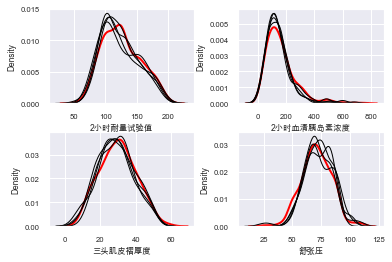

In [12]:
kernel.plot_imputed_distributions(wspace=0.3,hspace=0.3)

【miceforest+PMM高精度填补，详见正课】

<center><img src="https://s2.loli.net/2022/01/12/Pcqarbp7LuEKlNH.png" alt="image-20220112191024625" style="zoom:33%;" />

<center>

<img src="https://s2.loli.net/2022/01/12/mCse6uN5fZI1EVH.png" alt="image-20220112191055055" style="zoom:33%;" />

---

## <center>Part 4.缺失值填补方法选取依据

- 非特殊情况不建议采用模型自带的填补方法。CART树的填补仅会导向训练集模型结果最优，但不一定能真实的反应数据真实规律，模型容易过拟合；LGB则是简单的把缺失值看成一类，实际上也就是在执行真值转化；      
- 无论何时，如果能够从业务上推断出缺失值的真是取值，都应该首先采用该值进行填补，这是最高优先级的填补策略没有之一；      
- 缺失值的占比也会很大程度上影响缺失值填补策略的选择。缺失值占比过大或过小，都没有太大的填补意义。例如，当缺失值比例超过80%时，我们几乎不可能从剩余的20%的数据中还原这一列应有的原始信息，无论用哪种方法填补，“瞎猜”的成分都比较大，最后的建模风险会非常高，因此建议删除；而如果缺失值占比过小，例如仅有0.5%缺失值，则无论用哪种方法填补，实际上数据的变动都不会对该特征的分布造成太大的影响，因此填补的效果也非常有限，此时应优先考虑高效快速完成填补事宜；当然，如果缺失值的比例为50%左右时，此时“猜测”缺失值的取值也变的意义不大，而是否缺失这件事情本身可能会更有价值；      
- 很多时候，缺失值填补也不一定仅仅停留在对当前列的缺失数据进行修改，很多时候我们可以采用不同填补方案、生成多个列，然后在实际进行特征筛选时再进行挑选，甚至可以借助一些优化器帮我们筛选出最佳填补列。        

<center><img src="https://s2.loli.net/2022/01/12/26H9cbdigPpnav5.png" alt="image-20220112170410691" style="zoom:33%;" />

<center><img src="https://s2.loli.net/2022/01/12/zFTIXK37i6jr5DU.png" alt="image-20220112192212835" style="zoom:50%;" />